## Jeremy Kazimer
### 5018-1732
### Assignment #5

---

As always, import statements are necessary:

In [2]:
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt

In a one-dimensional random walk, the general premise is that the person starts at the origin.  Then, if viewed on a Cartesian set of axes, the person is always moving forward one step along the y-axis.  However, at each step they can either move to the left, right, or stay in their current location.  This is encoded by:

In [3]:
choices = [-1, 0, 1]

We define the `choices` as this because we only allow them to move in multiples of $1$.  Of course, in the real world, a person's stride is variant depending on a variety of factors.  However, for the purposes of simplicity, it will be kept this way.  A simple 1D simulation can be seen below:

In [4]:
'''
    dims -> the number of dimensions.
    n_walkers -> the number of iterations.
    n_steps -> the number of steps each walker will take.
'''

dims = 1
n_walkers = 10
n_steps = 500

We also have to define a shape for an array so that each step can be recorded:

In [7]:
steps = choice(a = choices, size = (n_walkers, n_steps, dims))

And then we take the cumulative sum, since this will give us the distance from the origin at any step:

In [21]:
distance_traveled = steps.cumsum(axis = 1)

Of course, what is a Jupyter notebook without its plots? Nothing!

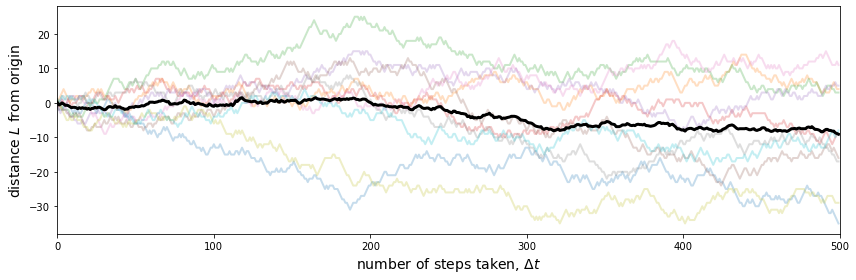

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (12, 4))

ax.plot(distance_traveled[:,:,0].T, lw = 2, alpha = 0.25);
ax.plot(distance_traveled[:,:,0].mean(axis = 0), lw = 3, c = 'black')

ax.set_xlim(0, n_steps)

ax.set_ylabel('distance $L$ from origin', fontsize = 14)
ax.set_xlabel(r'number of steps taken, $\Delta t$', fontsize = 14)

fig.tight_layout()

Note that the faded lines represent each individual walker, whereas the black line represents the average of those walkers.

This is effectively a [Markov Chain Monte Carlo](https://www.cs.cornell.edu/selman/cs475/lectures/intro-mcmc-lukas.pdf) simulation; basically, a random process - choosing which direction to walk - is done $N$ times to observe some greater phenomena.  This is the [Monte Carlo](https://www.investopedia.com/terms/m/montecarlosimulation.asp) portion.  The [Markov Chain](https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/markov-chain) aspect is then that the walker is transitioning from one 'state' to another, where the state is said walker's location.  This is a probabilistic process as well.  However, each option in our simulation has equal probability.  

Note that this can easily be generalized to higher dimensions, which we can do as a function:

In [18]:
L = distance_traveled[:,:,0].mean(axis = 0)

In [19]:
D = L**2/(2*n_steps)

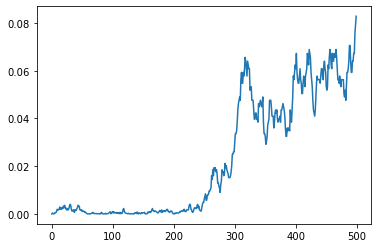

In [20]:
plt.plot(D)

https://web.stanford.edu/class/archive/cs/cs279/cs279.1172/lectures/lecture10.pdf